# 图像阈值处理
## 全局阈值法
这种方法非常简单，对每个像素应用相同的阈值。如果像素值小于阈值，则将其设置为 0，否则将其设置为最大值。我们可以通过 cv.threshold 函数设置阈值。第一个参是源图像，这里要求是灰度图像。第二个参数是阈值，用于对对象分类。第三个参数是分配给超过阈值像素值的最大值。OpenCV 提供了多种不同的阈值类型，这是有第四个参数来决定的。这些类型包括：

- cv2.THRESH_BINARY：二值阈值化
- cv2.THRESH_BINARY_INV：反向二值阈值化并反转
- cv2.THRESH_TRUNC：截断阈值化
- cv2.THRESH_TOZERO：低于阈值被置为 0
- cv2.THRESH_TOZERO_INV：高于阈值被置为 0

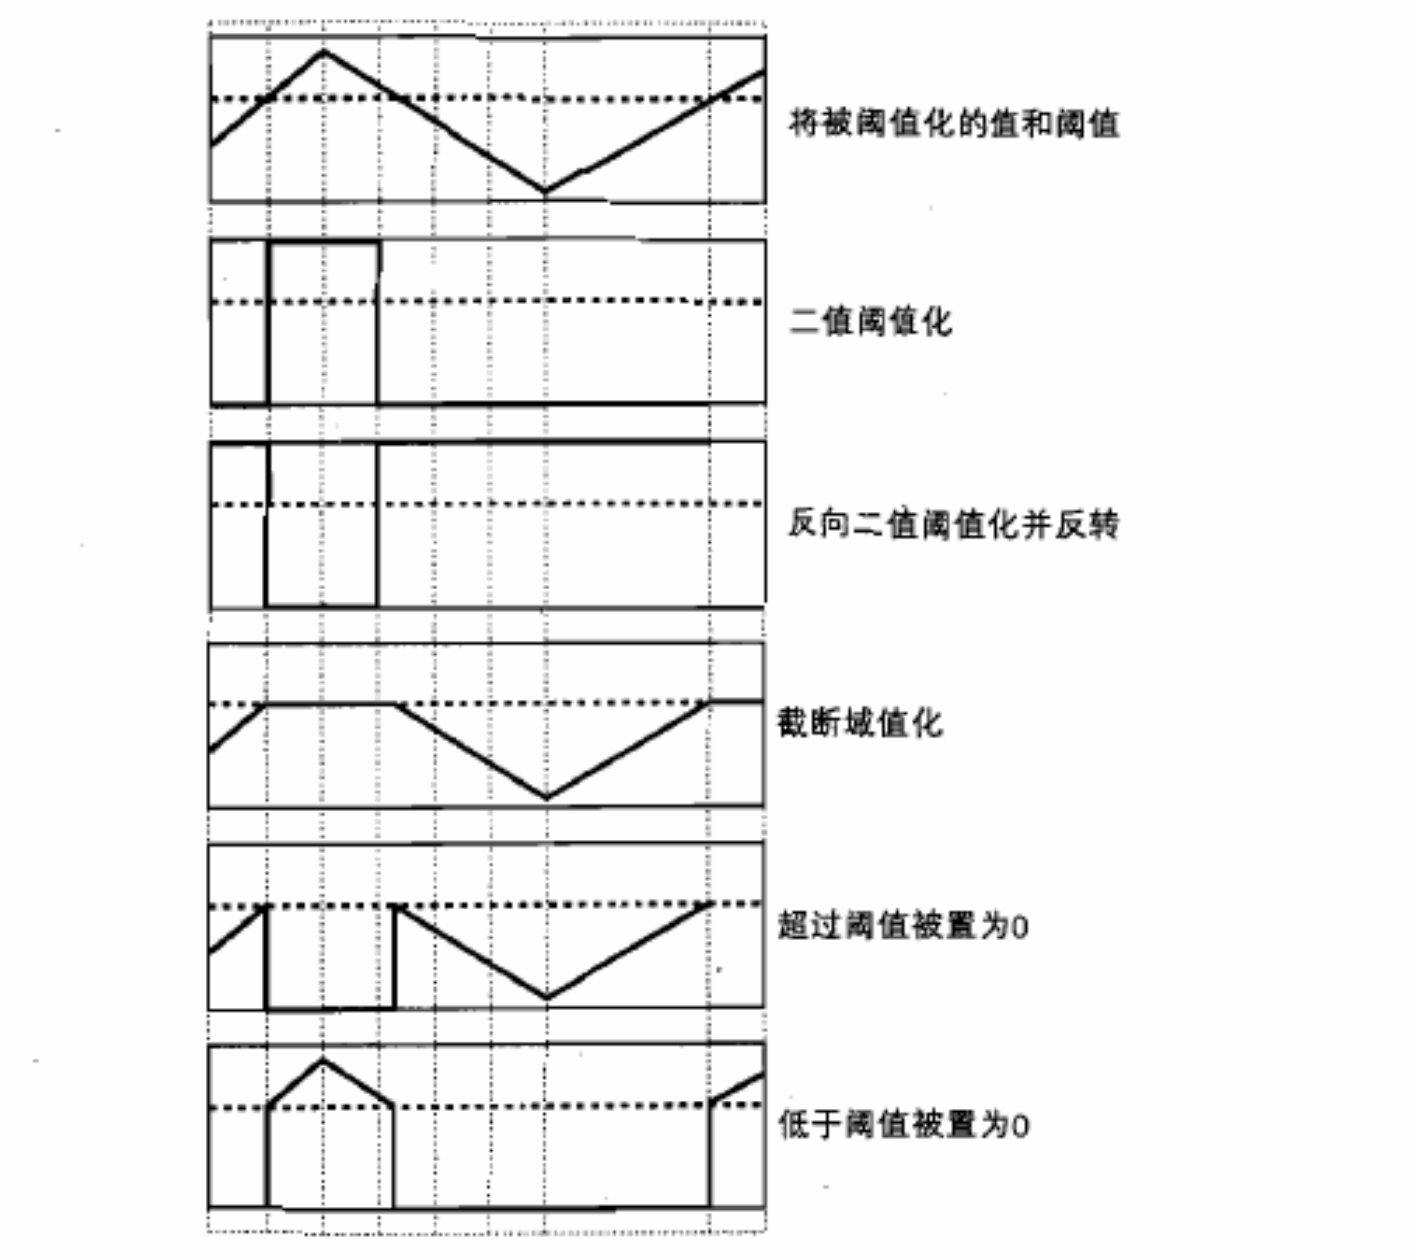

该方法返回两个输出。第一个是使用的阈值，第二个是输出的图像。
下列代码对比了不同阈值方法：

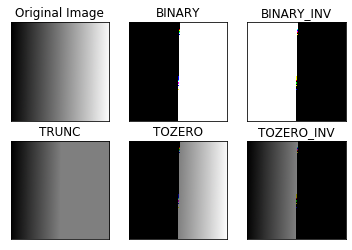

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('exp_images/gradient.png')

ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,th2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,th3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,th4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,th5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)

# 可视化
plt.subplot(231);plt.imshow(img,cmap='gray');plt.title("Original Image")
plt.xticks([]);plt.yticks([])
plt.subplot(232);plt.imshow(th1,cmap='gray');plt.title("BINARY")
plt.xticks([]);plt.yticks([])
plt.subplot(233);plt.imshow(th2,cmap='gray');plt.title("BINARY_INV")
plt.xticks([]);plt.yticks([])
plt.subplot(234);plt.imshow(th3,cmap='gray');plt.title("TRUNC")
plt.xticks([]);plt.yticks([])
plt.subplot(235);plt.imshow(th4,cmap='gray');plt.title("TOZERO")
plt.xticks([]);plt.yticks([])
plt.subplot(236);plt.imshow(th5,cmap='gray');plt.title("TOZERO_INV")
plt.xticks([]);plt.yticks([])
plt.show()

## 自适应阈值法
如果图像在不同区域具有不同的光照强度。在这种情况下就需要用到自适应阈值法。算法会根据临近区域的亮度确定阈值，因此，对于同一图像的不同区域将会对应不同的阈值。这样对于处理光照度变化的图像我们会得到更好的结果。

cv.adaptiveThreshold()需要设置 5 个参数，分别为：灰度图像、分配给满足条件的像素最大值、自适应阈值算法、阈值类型、邻域区域的大小、邻进像素的均值或加权和中减去的常量。

自适应阈值算法决定用于处理图像轮廓的方法。自适应阈值算法有两种，为ASAPTIVE_THRESH_MEAN_C（邻域平均值减去常量）和 ADAPTIVE_THRESH_ GAUSSIAN_C（领域高斯均值减去常量）。

阈值类型与全局阈值化不一样的是，自适应阈值化只有两个标准量，为 THRESH_BINARY 和 THRESH_BINARY_INV。

下面代码展示了具有不同光照强度图像的全局阈值化和自适应阈值化处理图像的输出。

## Otsu阈值法
在全局阈值中，我们使用任意选择的值作为阈值。相比之下，Otsu 阈值法会自动计算阈值，非常适用于双峰图像。

### 什么是双峰图像
双峰图像是指图片的灰度直方图上有两个峰值。灰度直方图就是 0~255 的像素值的个数统计。
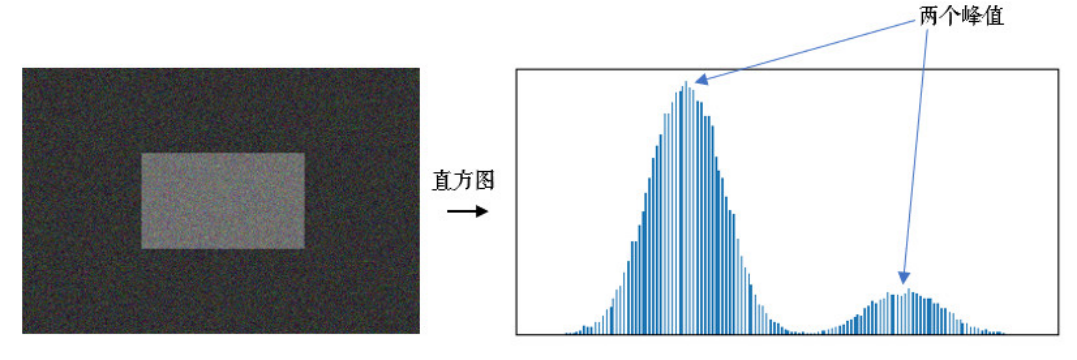

Otsu 算法假设这副图片由前景色和背景色组成，通过统计学方法（最大类间方差）选取一个阈值，将前景和背景尽可能分开，我们先来看下代码，然后详细说明下算法原理。

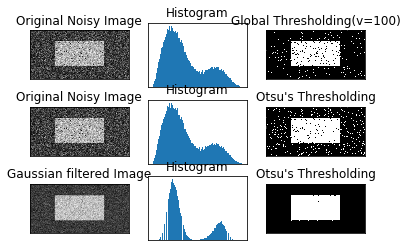

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("exp_images/noisy2.png",0)
# 全局阈值
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu图像
ret,th2 = cv.threshold(img,127,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# 高斯滤波（Gaussian filtering）后的Otsu图像
blur = cv.GaussianBlur(img,(5,5),0)
ret,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# 可视化
images = [[img,th1],[img,th2],[blur,th3]]
titles = [["Original Noisy Image","Global Thresholding(v=100)"],
          ["Original Noisy Image","Otsu's Thresholding"],
          ["Gaussian filtered Image","Otsu's Thresholding"]]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i][0],cmap='gray'),plt.title(titles[i][0])
    plt.xticks([]);plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i][0].ravel(),255),plt.title("Histogram")
    plt.xticks([]);plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i][1],cmap='gray'),plt.title(titles[i][1])
    plt.xticks([]);plt.yticks([])
plt.show()